# Phishing website detection using decision trees and random forests

## Business Understanding

The objective of this document is to first build and evaluate a simple decision tree classifier capable of predicting whether a website is a legitimate- or phishing site based on a set of conditions. Later, the model is expanded to use a random forest classifier instead. 

Identifying phishing sites is useful feature for browsers.

## Data Understanding

The dataset contains boolean flags of website and URL attributes as features, as well as a target column indicating whether a site is phishing or not.

## Data Preparation

In [38]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set

## Modeling the Decision Tree

In [40]:
decicion_tree_model = DecisionTreeClassifier(max_depth=2, random_state=20)
decicion_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=20)

In [41]:
X.keys()

Index(['having_ip_address', 'url_length', 'shortining_service',
       'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix',
       'having_sub_domain', 'sslfinal_state', 'domain_registration_length',
       'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe',
       'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank',
       'google_index', 'links_pointing_to_page', 'statistical_report'],
      dtype='object')

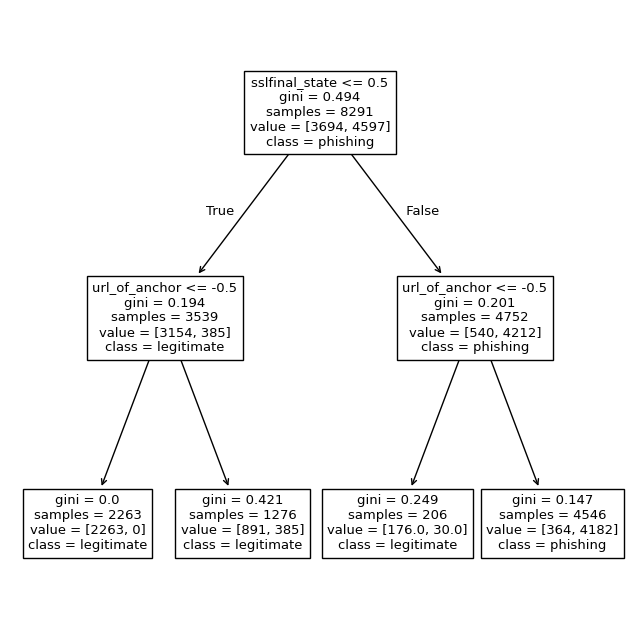

In [42]:
fig = plt.figure(figsize = (8, 8))
plot_tree(decicion_tree_model, feature_names = X.keys(), class_names = ['legitimate', 'phishing'])
plt.show()

## Decision Tree Evaluation

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predictions
y_pred = decicion_tree_model.predict(X_test)

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Precision
precision_test = precision_score(y_test, y_pred, pos_label=1)

# Recall
recall_test_2n = recall_score(y_test, y_pred, pos_label=1)


In [44]:
results_df = pd.DataFrame({
    'Accuracy': [accuracy_test],
    'Precision': [precision_test],
    'Recall': [recall_test_2n],
})

results_df['Overall Score'] = results_df['Accuracy'] + results_df['Precision'] + results_df['Recall']


results_df

,Accuracy,Precision,Recall,Overall Score
0,0.907019,0.928337,0.905128,2.740484


## Deployment